In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from classification_report import classification_report
from sklearn.tree import DecisionTreeClassifier

from adaboost import AdaBoostClassifier as MyAdaBoostClassifier
from decision_tree_classifier import DecisionTreeClassifier as MyDecisionTreeClassifier

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train_data = np.loadtxt('data/spam.train.txt')
test_data  = np.loadtxt('data/spam.test.txt')

X_train = train_data[0::, 1::]
y_train = train_data[0::, 0]
X_test = test_data[0::, 1::]
y_test = test_data[0::, 0]

In [3]:
y_train[y_train == 0] = -1
y_test[y_test == 0] = -1

In [4]:
my_ada_clf = MyAdaBoostClassifier(MyDecisionTreeClassifier(max_depth=1), n_estimators=600)
my_ada_clf.fit(X_train, y_train)
my_pred = my_ada_clf.predict(X_test)

In [5]:
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=600)
ada_clf.fit(X_train, y_train)
sklearn_pred = ada_clf.predict(X_test)

In [6]:
my_ada_clf_scores = my_ada_clf.staged_f1_score(X_test, y_test)

In [7]:
sk_staged_pred = ada_clf.staged_predict(X_test)
ada_clf_scores = []
for stage_pred in sk_staged_pred:
    ada_clf_scores.append(classification_report(y_test, stage_pred))

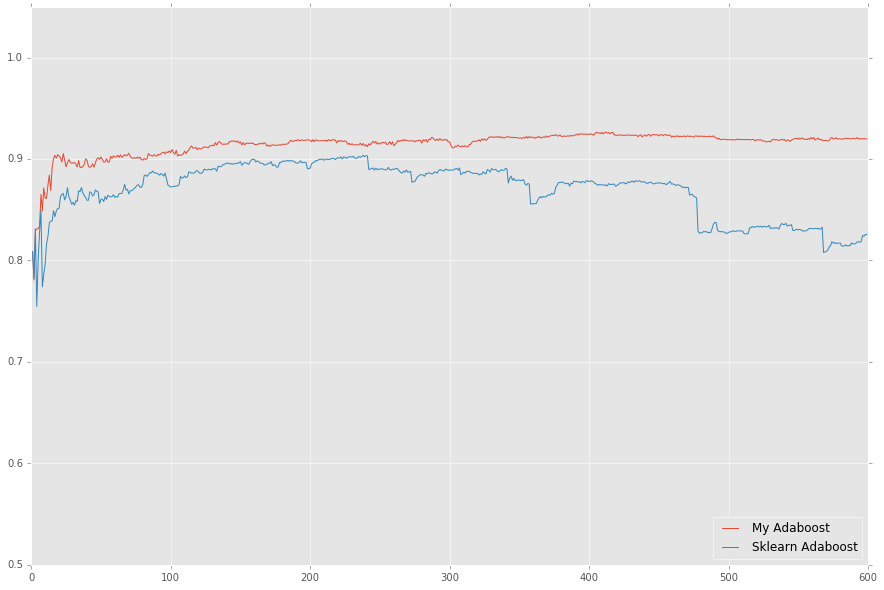

In [8]:
fig = plt.figure(figsize=(15, 10))
plt.plot(my_ada_clf_scores)
plt.plot(ada_clf_scores)
plt.ylim(ymax = 1.05, ymin = 0.5)
plt.legend(['My Adaboost', 'Sklearn Adaboost'], loc='lower right')
plt.show()

In [9]:
sk_feature_importances = ada_clf.feature_importances_
my_feature_importances = my_ada_clf.feature_importances_

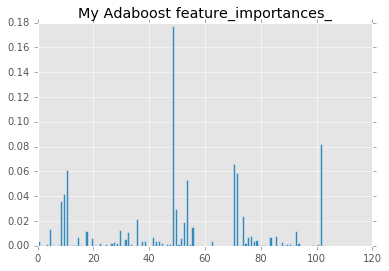

In [10]:
fig = plt.figure()
plt.title('My Adaboost feature_importances_')
n_features = my_feature_importances.shape[0]
plt.bar(np.arange(n_features) + 0.1, my_feature_importances, 0.8)
plt.show()

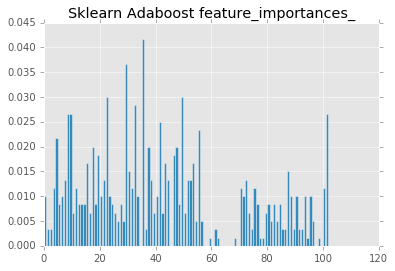

In [11]:
fig = plt.figure()
plt.title('Sklearn Adaboost feature_importances_')
n_features = sk_feature_importances.shape[0]
plt.bar(np.arange(n_features) + 0.1, sk_feature_importances, 0.8)
plt.show()